<a href="https://colab.research.google.com/github/dijanaperovic/ml-product-reviews-project/blob/main/product_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analiza sentimenta u recenzijama korisnika

Number of rows: 171380
First 5 rows:
                            review_uuid  \
0  31b07b9a-4567-4db1-81f6-1bcef33b3e7b   
1  1cb2b4b5-9805-4c2d-9393-6b1382cb7c53   
2  f64165f0-29a2-4cfb-8b15-13c0c893e54d   
3  e442e083-a343-4052-b015-41e531e52d3e   
4  f4abefb8-22f0-4672-af73-2aa2954b24e0   

                                        product_name product_price  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   

      review_title                                        review_text  \
0           Super!  great cooler excellent air flow and for this p...   
1          Awesome              best budget 2 fit cooler nice cooling   
2             Fair  the quality is good but the power of air is 

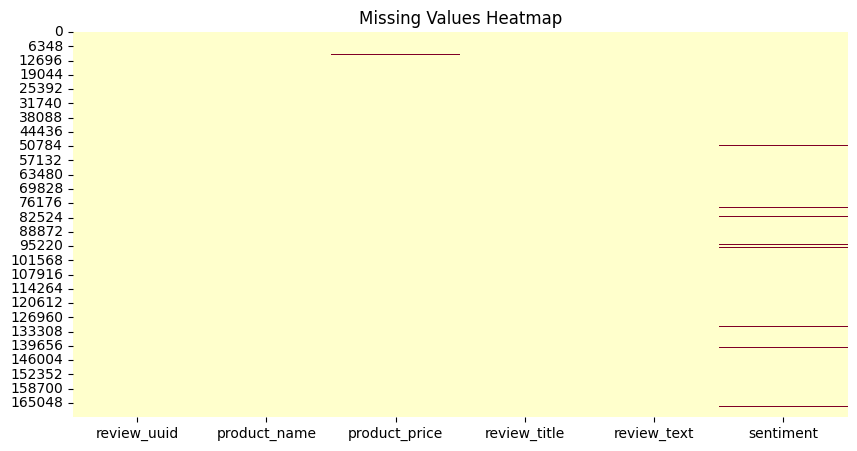

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/dijanaperovic/ml-product-reviews-project/refs/heads/main/data/product_reviews_full.csv"
df = pd.read_csv(url)

print("Number of rows:", len(df))
print("First 5 rows:")
print(df.head())
#EDA - Exploatory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
print("\nDataset analysis: ")
print("Data set info:")
df.info()
print("NA values per columns:")
print(df.isna().sum())
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

Distribution of sentiment values per class:  sentiment
positive    85537
negative    32369
Positive    22361
Negative    12392
neutral     10508
Neutral      3202
Name: count, dtype: int64


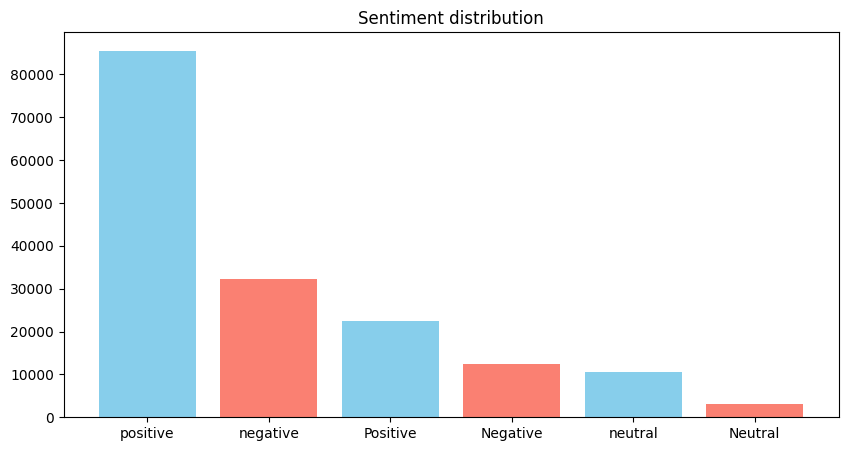

In [2]:
sentiment_counts = df['sentiment'].value_counts()
print("Distribution of sentiment values per class: ", sentiment_counts)
plt.figure(figsize=(10,5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color = ['skyblue', 'salmon'])
plt.title("Sentiment distribution")
plt.show()

In [3]:
#Analiza kolone product price i njeno prilagodjavanje odredjenom tipu podataka
print(df['product_price'].dtype)
print(df['product_price'].head(10))

print("The most frequent values in the column: ")
print(df['product_price'].value_counts().head(20))

# 4. Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
mask_for_problematic_values = df['product_price'].astype(str).str.strip().isin(problematic_values)
print(f"We have found {len(df[mask_for_problematic_values])} problematic values in this dataset.")
df_problematic_values = df[mask_for_problematic_values]
display(df_problematic_values[['product_price']].drop_duplicates())
#Dobijamo 0 problematicnih vrednosti sto je super

#Pronalaženje onih vrednosti koje nismo u mogućnosti da pretvorimo u numeric(sigurno ih ima tipa ove sa dolarom ispred)
price_clean = df['product_price'].astype(str).str.strip()
price_to_numeric = pd.to_numeric(price_clean, errors='coerce')
#pokusavamo da pretvorimo sve vrednosti u celijama u numericke u koloni sa cenama
#one koje su string(imaju $) tretiraju se kao NaN vrednost uz dodavanje ovog parametra errors='coerce'

invalid_prices = df[price_to_numeric.isna()]
print("Broj nevalidnih vrednosti: ", len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))


object
0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object
The most frequent values in the column: 
product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3.0         1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64
We have found 0 problematic values in this dataset.


,product_price


Broj nevalidnih vrednosti:  68858


,product_price
22,NaN
34279,$6.86
34512,$2.76
34553,$6.95
35245,$4.35
36212,$19.27
36613,$21.67
36622,$7.22
36753,$9.63
36766,$7.82


In [4]:
df = df.dropna()
print("Velicina dataseta nakon uklanjanja NA vrednosti: ", df.shape)
print(df.isna().sum())
print(len(df))
rows_with_nan = df[df.isnull().any(axis=1)]
# Display a random sample of rows that will be removed
print(" Randomly selected rows containing missing values:\n")
print(rows_with_nan.sample(n=min(5, len(rows_with_nan)), random_state=42))

Velicina dataseta nakon uklanjanja NA vrednosti:  (165960, 6)
review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64
165960
 Randomly selected rows containing missing values:

Empty DataFrame
Columns: [review_uuid, product_name, product_price, review_title, review_text, sentiment]
Index: []


In [5]:
#Parsiranje kolone sa cenama
df['product_price_cleaned'] = (df['product_price'].astype(str).str.replace(r'$', '', regex=True).str.replace('[^\d.]', '',regex = True).str.strip()) #uklanjanje svih tekst stvari iz Na celija osim tacke

#Konverzija u pravi tip podataka
df['product_price'] = pd.to_numeric(df['product_price_cleaned'], errors = 'coerce')
#Brisemo privremenu kolonu
df = df.drop(columns=['product_price_cleaned'])
df = df.dropna(subset=['product_price'])
#Proveravamo rezultat.
print("Column type after parsing:", df['product_price'].dtype)
print("\nPrice summary:")
print(df['product_price'].describe())

# Step 1: Convert all sentiment values to lowercase and strip extra spaces
df['sentiment'] = df['sentiment'].astype(str).str.lower().str.strip()

# Step 2: Show all unique values in the sentiment column
print("Unique sentiment values after cleaning:")
print(df['sentiment'].value_counts())

# Step 3: Convert column type to 'category'
df['sentiment'] = df['sentiment'].astype('category')
print("\nSentiment column converted to type:", df['sentiment'].dtype)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3727033401.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['product_price_cleaned'] = (df['product_price'].astype(str).str.replace(r'$', '', regex=True).str.replace('[^\d.]', '',regex = True).str.strip()) #uklanjanje svih tekst stvari iz Na celija osim tacke


Column type after parsing: float64

Price summary:
count    165960.000000
mean         65.786896
std         135.944167
min           0.180000
25%           4.190000
50%          14.450000
75%          66.250000
max        1566.140000
Name: product_price, dtype: float64
Unique sentiment values after cleaning:
sentiment
positive    107619
negative     44663
neutral      13678
Name: count, dtype: int64

Sentiment column converted to type: category


Koje kolone imam:  ['review_uuid', 'product_name', 'product_price', 'review_title', 'review_text', 'sentiment']
Cena proizvoda po sentimentu: 
              count       mean         std   min   25%    50%     75%      max
sentiment                                                                     
negative    44663.0  59.655028  112.306009  0.71  4.35  18.06  60.710  1566.14
neutral     13678.0  55.532342  107.524238  0.71  3.30  10.23  59.845  1204.70
positive   107619.0  69.635003  147.485845  0.18  4.20  14.08  66.250  1048.07


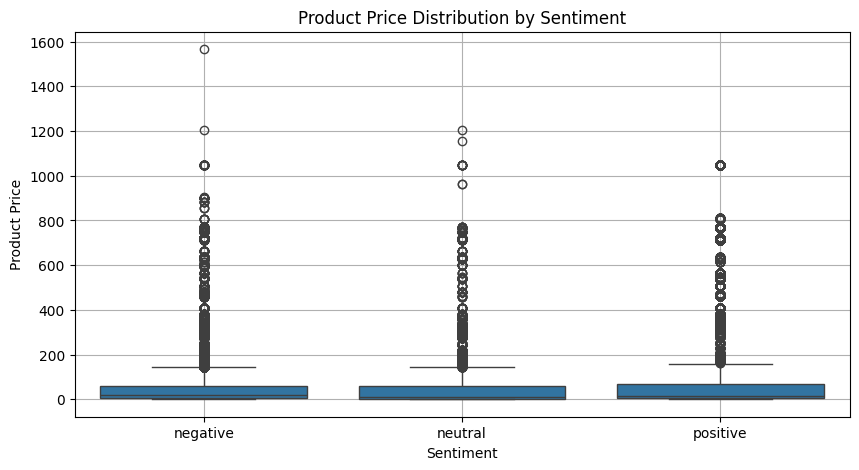

In [6]:
#Inzenjering karakteristika
#df = df.drop(columns=['review_uuid', 'product_name' ])
print("Koje kolone imam: ", df.columns.to_list())

#Da li product price ima uticaj na sentiment vec smo ovo radili sa onim koxevima i graificima
print("Cena proizvoda po sentimentu: ")
#observed=Flase znaci da se prikazuju i kategorije koje kategorijski nisu def. pocetno vec se pojavljuju u podacima
#da je stajalo true znaci samo se prikazuju one kolone izdvojene kategorijski u dataframe-u
print(df.groupby('sentiment', observed=False)['product_price'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='sentiment', y='product_price')
plt.grid(True)
plt.title("Product Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Product Price")
plt.show()

Generalnno ovde je slicna visina u sve tri kategorije, postoje takodje ekstremne vrednosti ali ne sada nesto drasticno da se odredjena kategorija izdvaja, tako da realno cena ne utice na ton(emociju) same recenzije.

count    165960.000000
mean         48.378435
std          76.611087
min           1.000000
25%           9.000000
50%          19.000000
75%          50.000000
max         523.000000
Name: review_lenght, dtype: float64

Analiza same duzine recenzija po kategorijama: 
              count       mean        std  min   25%   50%   75%    max
sentiment                                                              
negative    44663.0  60.900701  78.376363  1.0  16.0  32.0  71.0  523.0
neutral     13678.0  41.418190  64.707990  1.0   7.0  19.0  47.0  500.0
positive   107619.0  44.066187  76.679684  1.0   8.0  15.0  41.0  497.0


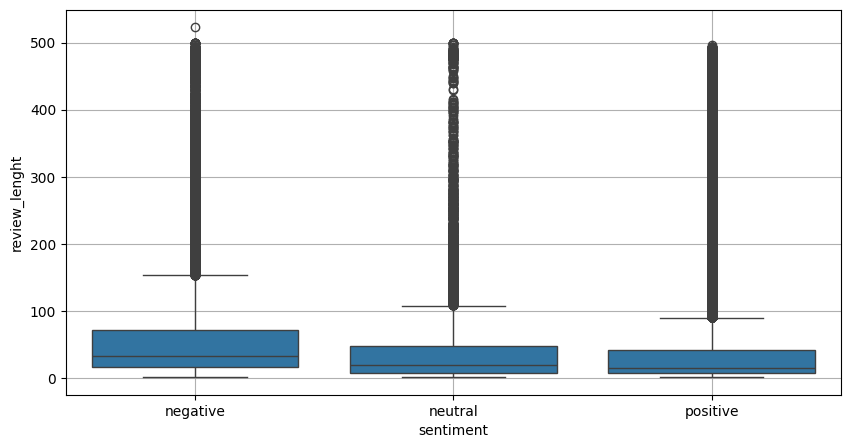

['review_uuid', 'product_name', 'product_price', 'review_title', 'review_text', 'sentiment', 'review_lenght']


In [7]:
#Pravljenje nove karakteristike

df['review_lenght'] = df['review_text'].astype(str).str.len()
print(df['review_lenght'].describe())

print("\nAnaliza same duzine recenzija po kategorijama: ")
print(df.groupby('sentiment', observed=False)['review_lenght'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='sentiment', y='review_lenght')
plt.grid(True)
plt.show()
print(df.columns.to_list())

Jeste da se ekstremne vrednosti(najduze recenzije) cesce javljaju u negativnoj kategoriji ali nije to ovde toliko izrazeno tj. od presudnog znacaja.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


X = df[["review_title", "review_text", "review_lenght"]]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[("title", TfidfVectorizer(), "review_title"),
                  ("text", TfidfVectorizer(), "review_text"),
                  ("lenght", MinMaxScaler(), ["review_lenght"])]
)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC()
}

for name,model in models.items():
  print(f"\n 🔹 {model}")
  pipeline = Pipeline([
      ("preprocessing", preprocessor ),
      ("classifier", model)])
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  print(classification_report(y_test, y_pred))


 🔹 LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

    negative       0.88      0.92      0.90      8932
     neutral       0.73      0.54      0.62      2736
    positive       0.96      0.97      0.97     21524

    accuracy                           0.92     33192
   macro avg       0.86      0.81      0.83     33192
weighted avg       0.92      0.92      0.92     33192


 🔹 MultinomialNB()
              precision    recall  f1-score   support

    negative       0.86      0.89      0.87      8932
     neutral       0.81      0.28      0.42      2736
    positive       0.92      0.98      0.95     21524

    accuracy                           0.90     33192
   macro avg       0.86      0.72      0.75     33192
weighted avg       0.89      0.90      0.88     33192


 🔹 DecisionTreeClassifier()


KeyboardInterrupt: 

In [ ]:
import joblib
# Define features and label
X = df[["review_title", "review_text", "review_lenght"]]
y = df["sentiment"]

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(), "review_title"),
        ("text", TfidfVectorizer(), "review_text"),
        ("length", MinMaxScaler(), ["review_lenght"])
    ]
)

# Define pipeline with the best model (e.g. RandomForestClassifier)
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier())
])

# Train the model on the entire dataset
pipeline.fit(X, y)

# Save the model to a file
joblib.dump(pipeline, "model/sentiment_model.pkl")

print(" Model trained and saved as 'model/sentiment_model.pkl'")


Koristimo ceo skup podataka za treniranje.
U ovoj fazi više ne delimo podatke na trening i test, već koristimo celokupni skup. Razlog je jednostavan: znamo da je ovaj model najbolji, pa želimo da on iskoristi sve dostupne podatke da nauči najviše što može.

In [ ]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load("model/sentiment_model.pkl")

print("Model loaded successfully!")
print("Type 'exit' at any point to stop.\n")

while True:
    title = input(" Enter review title: ")
    if title.lower() == "exit":
        print("Exiting...")
        break

    text = input(" Enter review text: ")
    if text.lower() == "exit":
        print("Exiting...")
        break

    # Compute review length
    review_length = len(text)

    # Create a DataFrame from input
    user_input = pd.DataFrame([{
        "review_title": title,
        "review_text": text,
        "review_length": review_length
    }])

    # Predict sentiment
    prediction = model.predict(user_input)[0]
    print(f" Predicted sentiment: {prediction}\n" + "-" * 40)